In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
dataset=pd.read_csv("/content/Data.csv")

In [3]:
dataset.shape

(12684, 25)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [5]:
# Calculate summary statistics for numerical features
summary_stats = dataset.describe()

# Display the summary statistics
print(summary_stats)

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp  Accept(Y/N?)  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [6]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("=" * 50)

Unique values in 'destination':
['No Urgent Place' 'Home' 'Work']
Unique values in 'passanger':
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in 'weather':
['Sunny' 'Rainy' 'Snowy']
Unique values in 'temperature':
[55 80 30]
Unique values in 'coupon':
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in 'expiration':
['1d' '2h']
Unique values in 'gender':
['Female' 'Male']
Unique values in 'age':
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in 'maritalStatus':
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in 'has_children':
[1 0]
Unique values in 'education':
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in 'occupation':
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & 

In [7]:
dataset.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

## **EDA**

In [8]:
column_data_types = dataset.dtypes
print(column_data_types)


destination             object
passanger               object
weather                 object
temperature              int64
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Accept(Y/N?)             int64
dtype: object


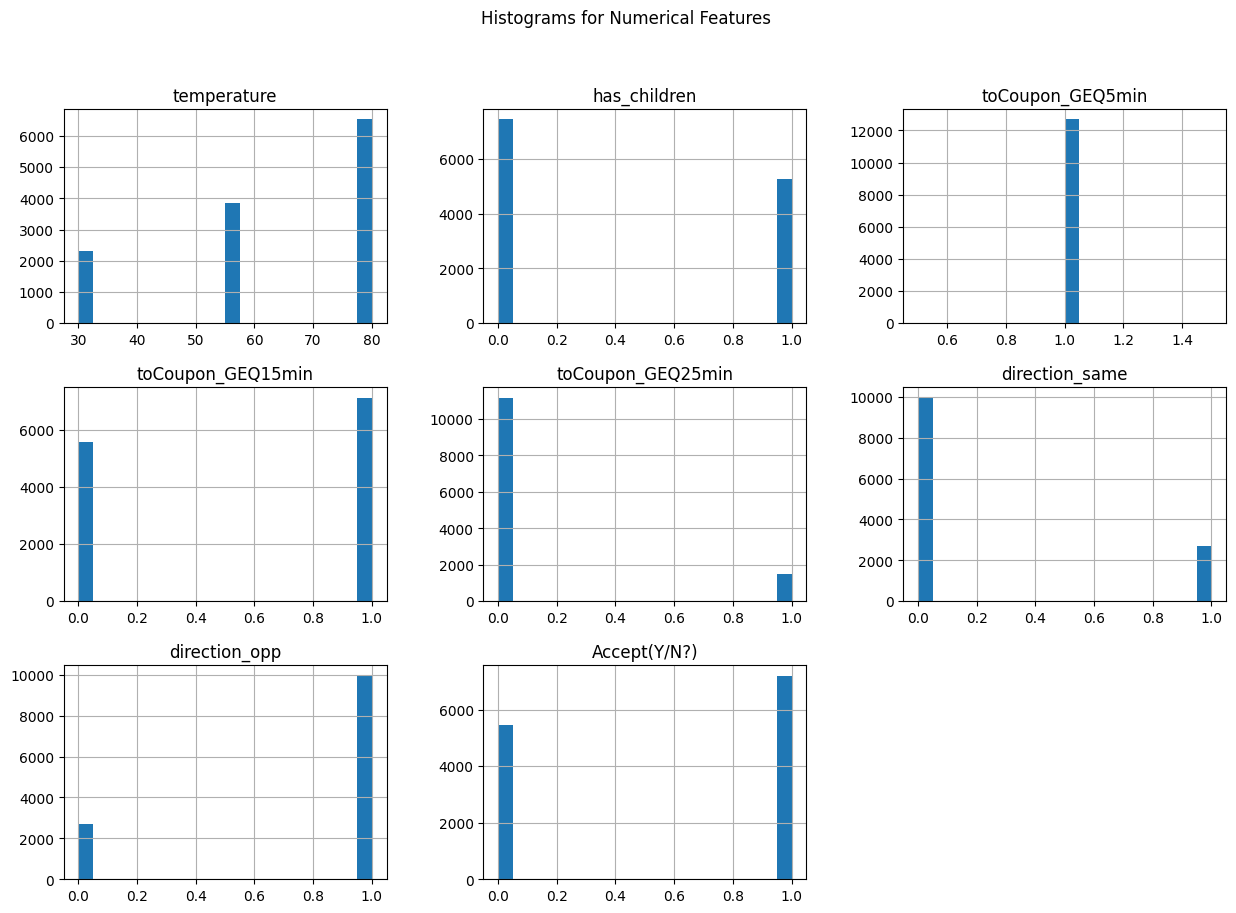

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
numerical_features = dataset.select_dtypes(include=['int64'])
numerical_features.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms for Numerical Features")
plt.show()

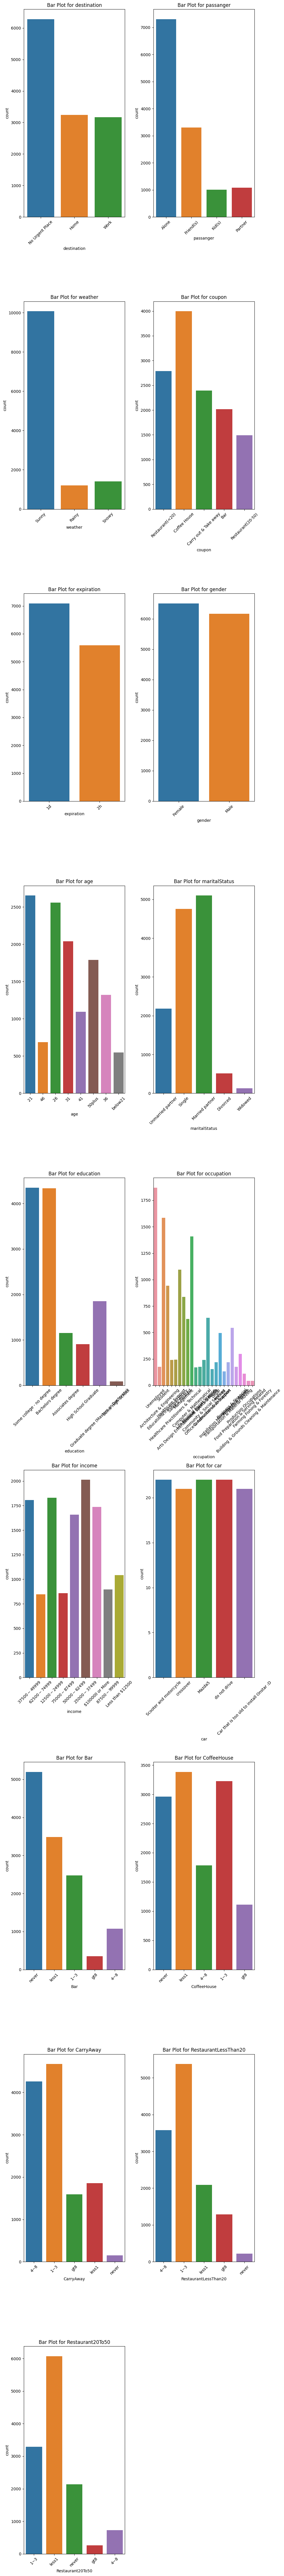

In [71]:
import math

# Create bar plots for categorical features
categorical_features = dataset.select_dtypes(include=['object'])
num_cols = len(categorical_features.columns)
num_rows = math.ceil(num_cols / 2)

plt.figure(figsize=(10, 10 * num_rows))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=dataset, x=column)
    plt.title(f"Bar Plot for {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

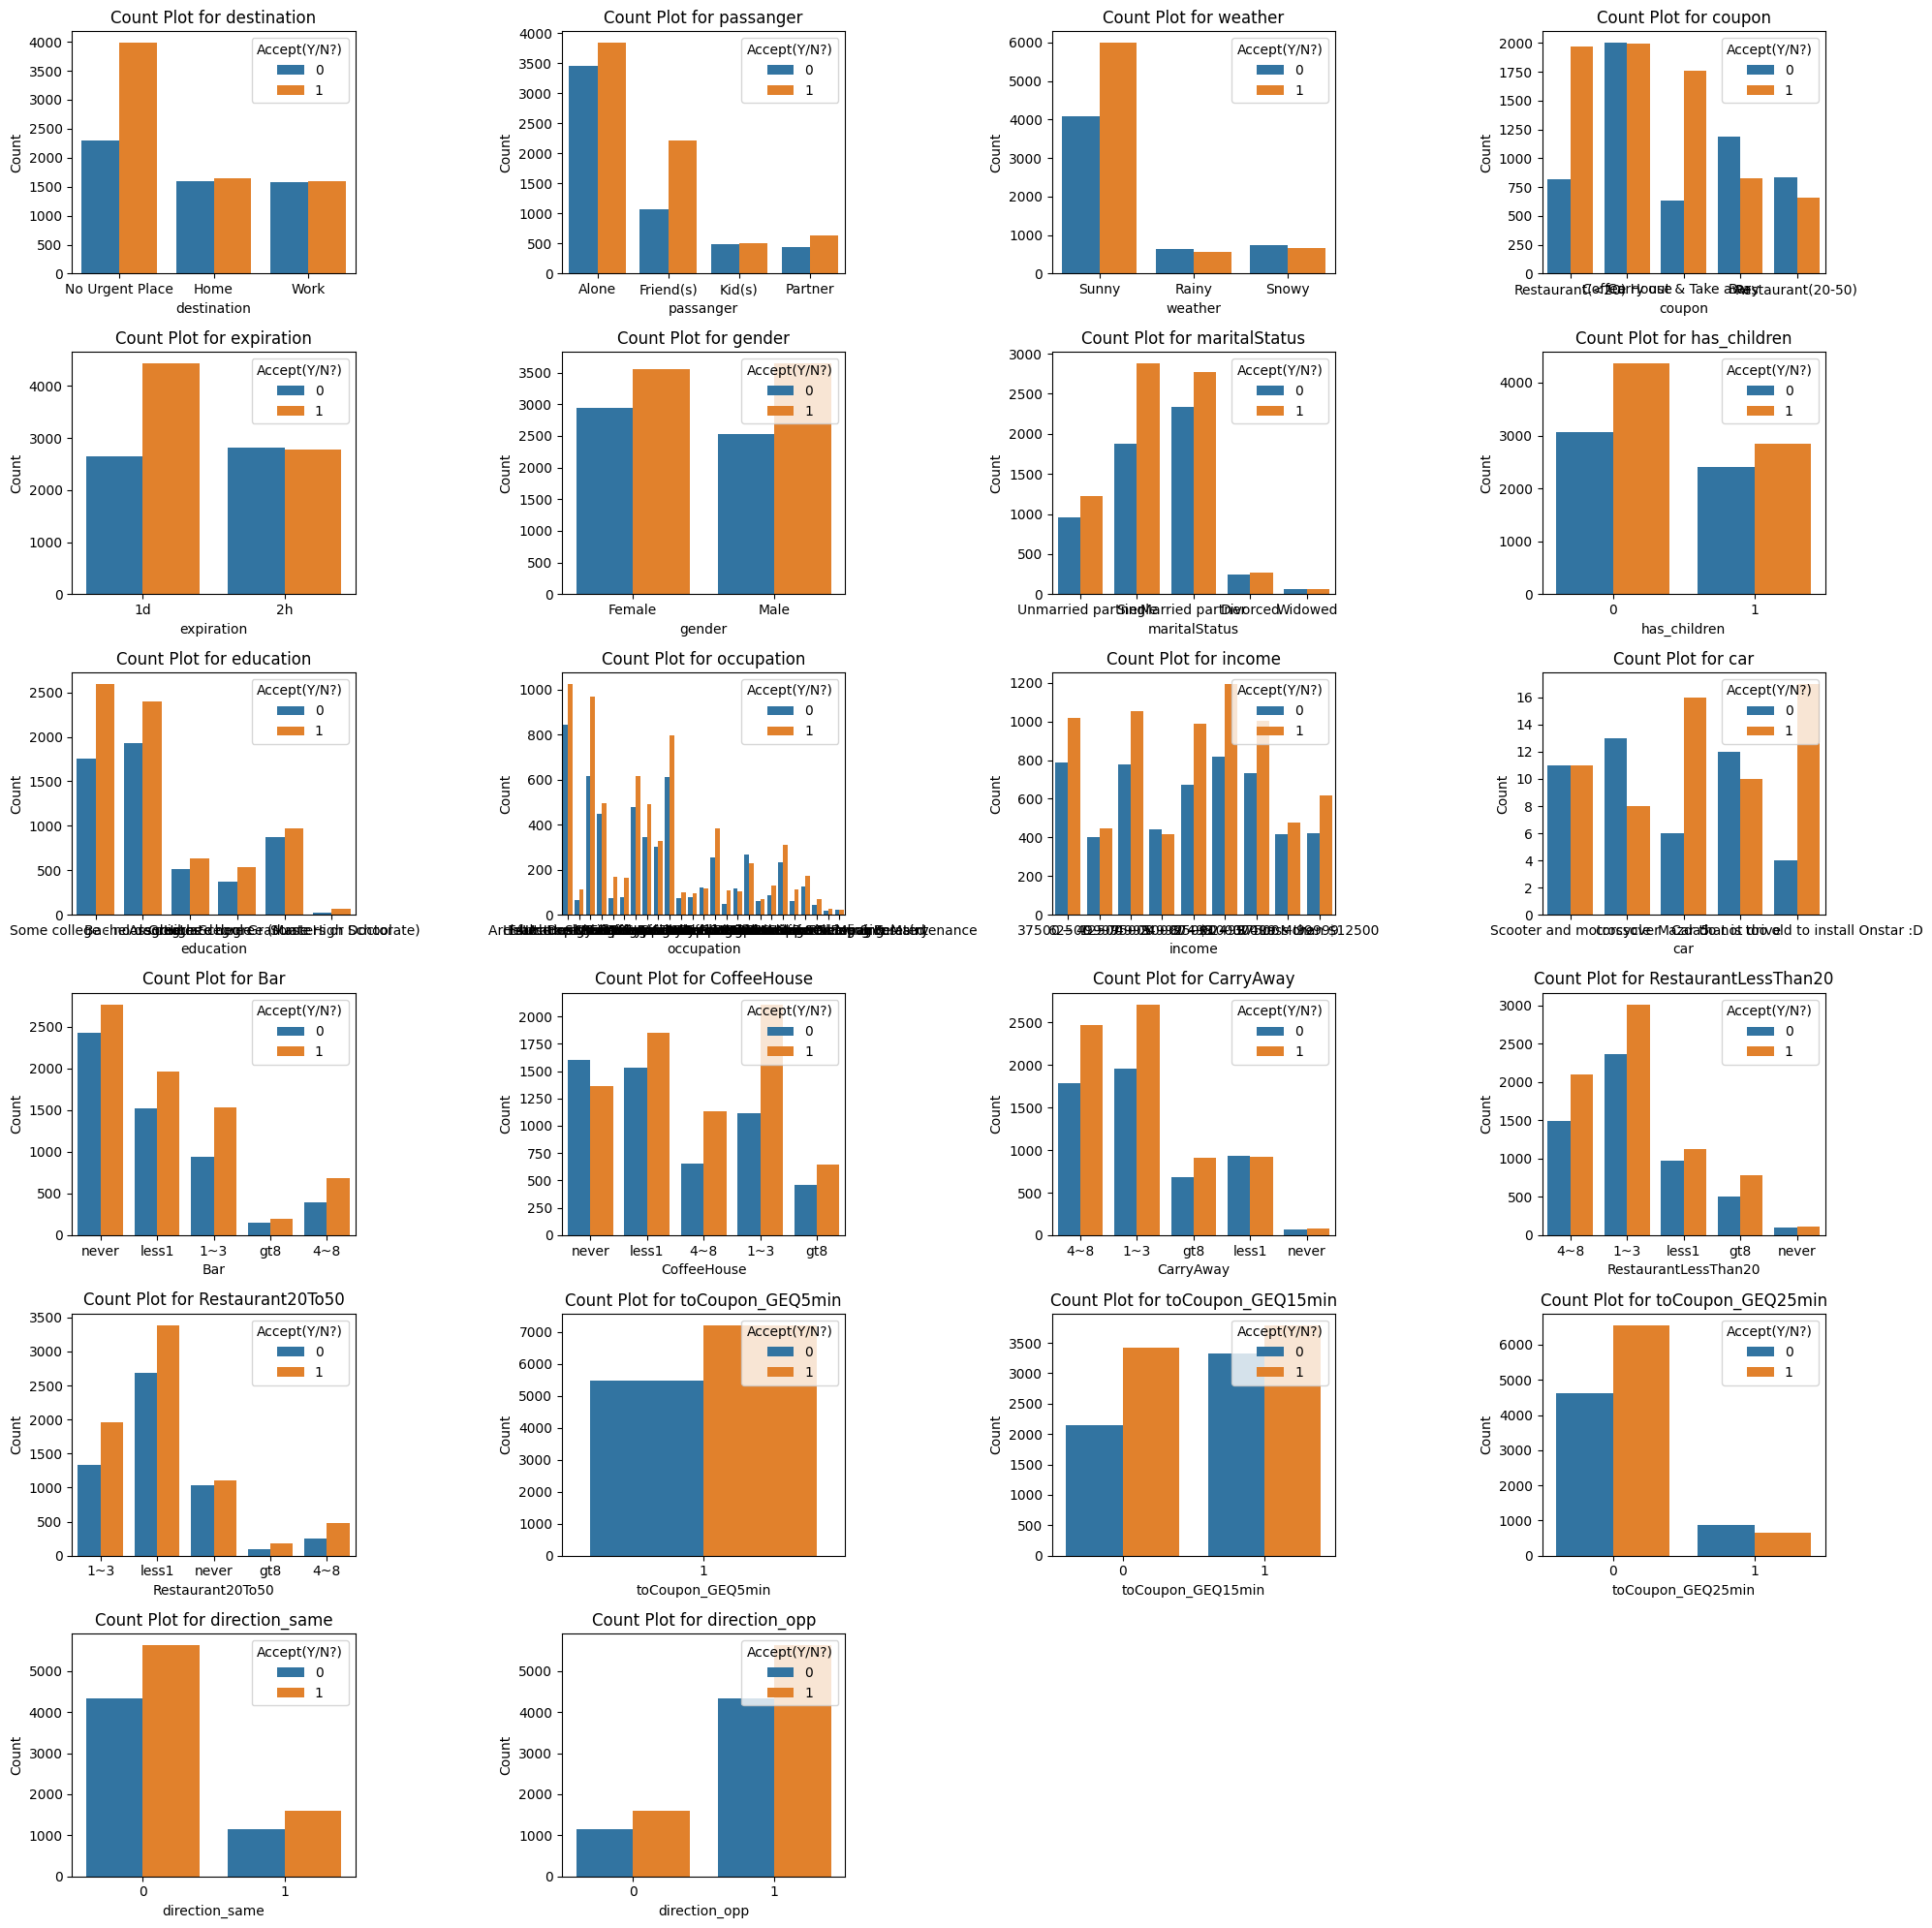

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
                       'maritalStatus', 'has_children', 'education', 'occupation', 'income',
                       'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
                       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']

# Create subplots for count plots
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.8)

# Loop through categorical columns and create count plots
for i, column in enumerate(categorical_columns):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    sns.countplot(data=dataset, x=column, hue='Accept(Y/N?)', ax=ax)
    ax.set_title(f"Count Plot for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.legend(title="Accept(Y/N?)", loc='upper right')

# Remove any empty subplots if the number of columns is not a multiple of 4
if len(categorical_columns) % 4 != 0:
    for i in range(len(categorical_columns) % 4, 4):
        fig.delaxes(axes[-1, i])

plt.tight_layout()
plt.show()


## This was the over view now lets check in detail

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency,pointbiserialr
from scipy.stats.contingency import association
import plotly.express as px

In [13]:
# checking the correlation to the target variable with the chi square.
# if the p-value is under 0.05, the correlation to the target variable is statistically significant.
def check_correlation(df,col,target_col):
  contigency = pd.crosstab(df[col],df[target_col])
  res = chi2_contingency(contigency)
  print(f"{col} - {target_col} : ", 'Correlated 'if res[1] < 0.05  else 'Not Correlated', ',',res[1])

# count probability acceptance to the column.
def probability(df, col):
  yes_man = df.loc[(df['Accept(Y/N?)'] == 1), col].value_counts()
  value_counts = df[col].value_counts()

  val_index = value_counts.index

  ratio_yes = yes_man / value_counts

  return  val_index, ratio_yes*100

# show the distribution of the column and its probability
def show_dist_prob(df, col):
    idx_occ, prob_occ = probability(df, col)

    occ_val_counts = df[col].value_counts()

    fig = make_subplots(cols=2, rows=1, subplot_titles=['Value Counts', 'Acceptance Probability'], shared_yaxes=True)

    fig.add_trace(
        go.Bar(x=occ_val_counts, y=occ_val_counts.index, orientation='h'),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(x=prob_occ, y=idx_occ, orientation='h'),
        row=1, col=2
    )

    fig.update_layout(title=col, width=800, height=600)

    fig.show()

In [14]:
val_counts_weather = dataset['weather'].value_counts()

val_counts_weather_with_y = dataset.groupby(['weather','Accept(Y/N?)']).size().reset_index(name="counts")


px.pie(names = val_counts_weather.index, values = val_counts_weather, title = 'Weather Frequency', width = 800, height = 600)

In [15]:
index, ratio_weather = probability(dataset,'weather')

fig = px.bar(x = index , y = ratio_weather , title = 'Probability of True Value Based on Coupon Acceptance and Weather', width = 800, height = 600)
fig.show()
check_correlation(dataset.copy(),'weather','Accept(Y/N?)')

weather - Accept(Y/N?) :  Correlated  , 8.312207740720093e-31


This shows that the probability of sunny weather to coupon acceptance is 60%. It means, if we give the coupon to on the sunny weather, the acceptance is probably high.

In [16]:
fig = make_subplots(rows= 1 , cols= 2, subplot_titles = ['same direction', 'opposite'])

same_idx, same_val = probability(dataset.copy(),'direction_same')
opp_idx, opp_val = probability(dataset.copy(),'direction_opp')

print(pd.crosstab(dataset['direction_same'], dataset['Accept(Y/N?)']))

fig.add_trace(
    go.Bar(x = opp_idx, y = opp_val), row = 1 , col = 1
)

fig.add_trace(
    go.Bar(x = same_idx, y = same_val), row = 1, col = 2
)

fig.update_layout(height=400, width=600, title_text="Same vs opposite probability to the coupon acceptance")
fig.show()
check_correlation(dataset,'direction_same','Accept(Y/N?)')
check_correlation(dataset,'direction_opp','Accept(Y/N?)')

Accept(Y/N?)       0     1
direction_same            
0               4336  5624
1               1138  1586


direction_same - Accept(Y/N?) :  Not Correlated , 0.10541990881286277
direction_opp - Accept(Y/N?) :  Not Correlated , 0.10541990881286277


Based on the contigency table and probability analysis, the frequency between same direction and opposite dirrection to the coupon acceptance (Accept(Y/N?)) is slightly different. In addition, Both of the variable are not statisticaly correlated with the coupon acceptance.

In [17]:
expire_idx, expire_prob = probability(dataset.copy(),'expiration')

fig = make_subplots(subplot_titles = 'Expiration')

fig.add_trace(
    go.Bar(x = expire_idx, y = expire_prob)
)

fig.update_layout(height=400, width=600, title_text="Probability to The Coupon Acceptance")
fig.show()

check_correlation(dataset.copy(),'expiration','Accept(Y/N?)')

expiration - Accept(Y/N?) :  Correlated  , 2.2875426931245946e-48


we see that more people accept the coupon when it expires in one day.
the expiration is  statistically correlated with coupon acceptance.

In [18]:
def income_output(df,li,col):

  temp_df = df[[col,'Accept(Y/N?)']].copy()
  temp_df['high_acc'] = temp_df[col].apply(lambda x : x in li)

  return temp_df

def descending_withThresh(prob,thresh):
  return prob.sort_values(ascending = False).iloc[:-thresh].index


def get_higher_variable(df,col):
  idx , prob = probability(df,col)
  thresh_result = {'p-value':[],'crammer_v':[]}
  thresh_li = [x for x in range(1,len(prob)+1)]

  desc_result = prob.sort_values(ascending = False)

  for i in thresh_li:
    high_acc = descending_withThresh(desc_result,i)


    df_res = income_output(df.copy(),high_acc,col)

    cont = pd.crosstab(df_res['high_acc'],df_res['Accept(Y/N?)'])

    correlation = chi2_contingency(cont)[1]
    assoc = association(cont,method = 'cramer')

    thresh_result['p-value'].append(correlation)
    thresh_result['crammer_v'].append(assoc)

  result_df = pd.DataFrame(thresh_result, index = thresh_li)
  result_df = result_df[result_df['p-value'] < 0.01]

  max_thresh_index = result_df[result_df['crammer_v'] == result_df['crammer_v'].max()].index[0]
  max_filtered = descending_withThresh(desc_result,max_thresh_index)

  return result_df , descending_withThresh(desc_result,max_thresh_index),desc_result[max_filtered]

In [19]:
show_dist_prob(dataset,'income')
check_correlation(dataset,'income','Accept(Y/N?)')

income - Accept(Y/N?) :  Correlated  , 4.30446851198096e-08


Based on the probability analysis, we see that the person with the very high income (87500) has the lowest acceptance probability. Otherwise, the person with a medium income (50000 - 62499) has the highest acceptance probability. The correlation with coupon acceptance (Accept(Y/N?)) seems to be statistically significant, since the chi-square p-value is under 0.05.

In addition, to filter which income has high probability to accept the coupon, we can use the threshold. The threshold is the index that we exclude in the probability series. The final threshold is choosen based on the strength of the correlation (crammer v).

In [20]:
result_df, acc_income, desc_income = get_higher_variable(dataset,'income')
result_df

,p-value,crammer_v
1,2.118415e-07,0.046388
2,1.561199e-08,0.050442
3,4.614217e-10,0.055529
4,2.338202e-08,0.049756
5,8.804490e-07,0.043815
6,8.656964e-06,0.039661
7,1.959987e-04,0.033243


In [21]:
desc_income

$50000 - $62499     59.553948
$25000 - $37499     59.314456
Less than $12500    59.309021
$100000 or More     57.834101
$12500 - $24999     57.454943
$37500 - $49999     56.398892
Name: income, dtype: float64

In [22]:
show_dist_prob(dataset.copy(),'occupation')
check_correlation(dataset,'income','Accept(Y/N?)')

income - Accept(Y/N?) :  Correlated  , 4.30446851198096e-08


Based on the probability of each job, we see that there are some jobs with high probability of acceptance. The highest acceptance of the voucher goes to health care practitioners and technical. In addition, the p-value of the chisquare is less than 0.05, which indicates that this column is statistically correlated with the acceptance of the coupon.

However, to easily determine the jobs with high acceptance, we can use the threshold as well as the income columns.

In [23]:
job_df, acc_job, desc_job = get_higher_variable(dataset,'occupation')
job_df

,p-value,crammer_v
1,6.125515e-07,0.044693
2,4.584956e-09,0.052391
3,1.450870e-10,0.057221
4,8.659544e-12,0.060860
5,4.804529e-14,0.067123
6,3.019403e-14,0.067655
7,2.612863e-14,0.067820
8,2.511262e-15,0.070427
9,1.465974e-15,0.071018
10,1.532376e-15,0.070965


In [24]:
desc_job

Healthcare Support                           69.834711
Construction & Extraction                    68.831169
Healthcare Practitioners & Technical         67.622951
Protective Service                           64.571429
Architecture & Engineering                   63.428571
Production Occupations                       61.818182
Student                                      61.047980
Office & Administrative Support              60.093897
Transportation & Material Moving             59.633028
Building & Grounds Cleaning & Maintenance    59.090909
Management                                   58.830549
Food Preparation & Serving Related           58.389262
Name: occupation, dtype: float64

In [25]:
show_dist_prob(dataset.copy(),'coupon')
check_correlation(dataset,'coupon','Accept(Y/N?)')

coupon - Accept(Y/N?) :  Correlated  , 8.575341747082738e-188


Based on the probability of acceptance, we see that the restaurant (< 20) and carry out & take away coupons have the highest probability (arround 70%). Moreover, the correlation with the coupon acceptance is statistically correlated because the p-value is below 0.05.

In [26]:
selected_col = ['age','gender','maritalStatus','has_children','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','destination','passanger']

In [27]:
for col in selected_col :
  check_correlation(dataset,col,'Accept(Y/N?)')

age - Accept(Y/N?) :  Correlated  , 3.5221422366296096e-11
gender - Accept(Y/N?) :  Correlated  , 8.05552865589407e-07
maritalStatus - Accept(Y/N?) :  Correlated  , 6.489647983232487e-10
has_children - Accept(Y/N?) :  Correlated  , 3.1775773676508616e-07
toCoupon_GEQ5min - Accept(Y/N?) :  Not Correlated , 1.0
toCoupon_GEQ15min - Accept(Y/N?) :  Correlated  , 4.6359722947672643e-20
toCoupon_GEQ25min - Accept(Y/N?) :  Correlated  , 2.4662838393790205e-31
CoffeeHouse - Accept(Y/N?) :  Correlated  , 1.0794963990512695e-58
CarryAway - Accept(Y/N?) :  Correlated  , 1.5006376228356664e-08
RestaurantLessThan20 - Accept(Y/N?) :  Correlated  , 7.57454069770614e-05
Restaurant20To50 - Accept(Y/N?) :  Correlated  , 9.539081767804664e-14
destination - Accept(Y/N?) :  Correlated  , 8.40265678045787e-48
passanger - Accept(Y/N?) :  Correlated  , 7.284119805592145e-48


We already saw that the column toCoupon_GEQ5min has only one value and does not seem to be correlated with the Accept(Y/N?)-value. Therefore, we should drop this column.

In [28]:
dataset.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

The car column has 99% null values. Therefore, we should drop the column.

### Data Preprocessing

In [29]:
droped_column = ['car','toCoupon_GEQ5min','direction_same','direction_opp']
new_dataset = dataset.drop(columns = droped_column)

In [30]:
new_dataset.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
Accept(Y/N?)              0
dtype: int64

In [31]:
#filling the value as never because filling with mode wont be a proper way to fill the unknows rather we just assume that they have not been to the specific place
new_dataset = new_dataset.fillna('never')

In [32]:
new_dataset.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
Accept(Y/N?)            0
dtype: int64

In [33]:
Label_encoding_columns = ['Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'education', 'income', 'age']

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [35]:
label_encoder = LabelEncoder()
for column in Label_encoding_columns:
    new_dataset[column] = label_encoder.fit_transform(new_dataset[column])

In [36]:
OHE_columns = ['destination', 'passanger', 'weather', 'coupon', 'gender','maritalStatus','expiration', 'occupation']

In [37]:
new_dataset = pd.get_dummies(new_dataset, columns=OHE_columns, drop_first=True)

In [38]:
new_dataset.head()

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,55,0,1,5,3,4,4,4,1,0,...,0,0,0,0,0,0,0,0,0,1
1,80,0,1,5,3,4,4,4,1,0,...,0,0,0,0,0,0,0,0,0,1
2,80,0,1,5,3,4,4,4,1,0,...,0,0,0,0,0,0,0,0,0,1
3,80,0,1,5,3,4,4,4,1,0,...,0,0,0,0,0,0,0,0,0,1
4,80,0,1,5,3,4,4,4,1,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
dataset.shape

(12684, 25)

In [40]:
new_dataset.shape

(12684, 54)

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the 'temperature' column
new_dataset['temperature'] = scaler.fit_transform(new_dataset[['temperature']])


# Viewing the scaled 'temperature' column
print(new_dataset['temperature'])


0        0.5
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
12679    0.5
12680    0.5
12681    0.0
12682    0.0
12683    1.0
Name: temperature, Length: 12684, dtype: float64


In [42]:
#Spiltting data


Y = new_dataset["Accept(Y/N?)"]

X = new_dataset.drop("Accept(Y/N?)", axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100,stratify=Y)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict

In [45]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [46]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from imblearn.over_sampling import SMOTE
from category_encoders import CatBoostEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,recall_score,precision_score,f1_score,balanced_accuracy_score,roc_auc_score,ConfusionMatrixDisplay


In [48]:
rf=RandomForestClassifier()
bg=BaggingClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
ExtraTrees = ExtraTreesClassifier()
LGBM=LGBMClassifier()
adaboost=AdaBoostClassifier()
sgd=SGDClassifier()
catboost=CatBoostClassifier()
logit=LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ExtraTrees = ExtraTreesClassifier()
for model in[rf,bg,dt,svc,LGBM,adaboost,sgd,catboost,logit]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc = model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')

    # print of metrics
    print("confusion matrix \n",cm)
    print("======="*3)
    print("Accuracy \n",AS)
    print("======="*3)
    print("Classification Report \n",CR)
    print("======="*3)
    print("ROC_AUC \n",ROC)
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS)

Performance of RandomForestClassifier()
confusion matrix 
 [[ 734  361]
 [ 268 1174]]
Accuracy 
 0.7520693732755223
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.67      0.70      1095
           1       0.76      0.81      0.79      1442

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537

ROC_AUC 
 0.7422333263668547
MACRO Precision_recall_F1 
 (0.7486778885226291, 0.7422333263668548, 0.744380578554164, None)
Performance of BaggingClassifier()
confusion matrix 
 [[ 771  324]
 [ 366 1076]]
Accuracy 
 0.7280252266456445
Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      1095
           1       0.77      0.75      0.76      1442

    accuracy                           0.73      2537
   macro avg       0.72      0.73      0.72      2537
wei

finding which are the best feature which affects model decision

In [50]:
new_dataset.dtypes

temperature                                             float64
age                                                       int64
has_children                                              int64
education                                                 int64
income                                                    int64
Bar                                                       int64
CoffeeHouse                                               int64
CarryAway                                                 int64
RestaurantLessThan20                                      int64
Restaurant20To50                                          int64
toCoupon_GEQ15min                                         int64
toCoupon_GEQ25min                                         int64
Accept(Y/N?)                                              int64
destination_No Urgent Place                               uint8
destination_Work                                          uint8
passanger_Friend(s)                     

In [51]:
val_counts_y = Y_train.value_counts()

px.bar(x = val_counts_y.index , y = val_counts_y, width = 600, height = 600,title = 'Y Value Distribution')

resampling data

In [52]:
r = SMOTE(random_state=42)

X_train_resample,Y_train_resample = r.fit_resample(X_train,Y_train)

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif

In [54]:
bestfeatures=SelectKBest(score_func=mutual_info_classif)
best_features=bestfeatures.fit(X_train,Y_train)

In [55]:
dfscores=pd.DataFrame(best_features.scores_)
dfscores

,0
0,0.000000
1,0.001778
2,0.000000
3,0.000000
4,0.001887
5,0.008392
6,0.009090
7,0.010779
8,0.000000
9,0.001614


In [56]:
dfcolumns=pd.DataFrame(X.columns)

In [57]:
#concating the two dataframe
features_score=pd.concat([dfcolumns,dfscores],axis=1)
features_score

,0,0
0,temperature,0.000000
1,age,0.001778
2,has_children,0.000000
3,education,0.000000
4,income,0.001887
5,Bar,0.008392
6,CoffeeHouse,0.009090
7,CarryAway,0.010779
8,RestaurantLessThan20,0.000000
9,Restaurant20To50,0.001614


In [58]:
features_score.columns=["Features","Score"]
features_score

,Features,Score
0,temperature,0.000000
1,age,0.001778
2,has_children,0.000000
3,education,0.000000
4,income,0.001887
5,Bar,0.008392
6,CoffeeHouse,0.009090
7,CarryAway,0.010779
8,RestaurantLessThan20,0.000000
9,Restaurant20To50,0.001614


In [59]:
best_features=features_score.nlargest(20,"Score")
best_features

,Features,Score
22,coupon_Restaurant(<20),0.018628
19,coupon_Carry out & Take away,0.017371
18,weather_Sunny,0.012748
14,passanger_Friend(s),0.012687
7,CarryAway,0.010779
6,CoffeeHouse,0.009090
40,occupation_Installation Maintenance & Repair,0.008710
38,occupation_Healthcare Practitioners & Technical,0.008470
5,Bar,0.008392
29,occupation_Arts Design Entertainment Sports & ...,0.008324


**coupon carry out and restaurant, coupon less than 20,weather_sunny, passanger_friends** give the most impact on the model decision.

In [60]:
#lets see what happens after resampling
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ExtraTrees = ExtraTreesClassifier()
for model in[rf,bg,dt,svc,LGBM,adaboost,sgd,catboost,logit]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc = model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')

    # print of metrics
    print("confusion matrix \n",cm)
    print("======="*3)
    print("Accuracy \n",AS)
    print("======="*3)
    print("Classification Report \n",CR)
    print("======="*3)
    print("ROC_AUC \n",ROC)
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS)

Performance of RandomForestClassifier()
confusion matrix 
 [[ 718  377]
 [ 263 1179]]
Accuracy 
 0.7477335435553804
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.66      0.69      1095
           1       0.76      0.82      0.79      1442

    accuracy                           0.75      2537
   macro avg       0.74      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537

ROC_AUC 
 0.7366610934838093
MACRO Precision_recall_F1 
 (0.7448091502034805, 0.7366610934838093, 0.7391195928949421, None)
Performance of BaggingClassifier()
confusion matrix 
 [[ 768  327]
 [ 372 1070]]
Accuracy 
 0.724477729601892
Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.70      0.69      1095
           1       0.77      0.74      0.75      1442

    accuracy                           0.72      2537
   macro avg       0.72      0.72      0.72      2537
wei

since even after SMOTE resampling the accuracy didnt imporve infact reduced we will go for Hyperparameter tunning

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [62]:

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, Y_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)



Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.7603468663776114


In [64]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for CatBoostClassifier
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
}

# Create the CatBoost classifier
catboost = CatBoostClassifier(verbose=0)  # Setting verbose to 0 to reduce output

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, Y_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters for CatBoost:")
print(best_params)
print("Test Accuracy for CatBoost:", test_accuracy)


Best Hyperparameters for CatBoost:
{'depth': 8, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Test Accuracy for CatBoost: 0.7713835238470634


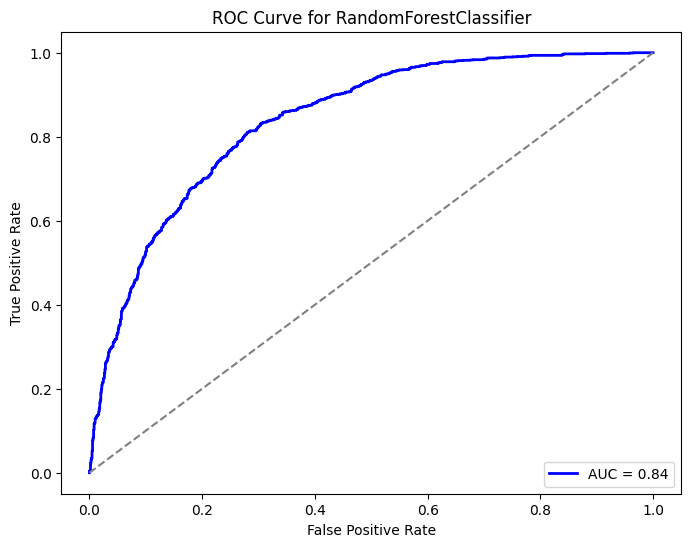

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


predictions = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, predictions)
auc = roc_auc_score(Y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()



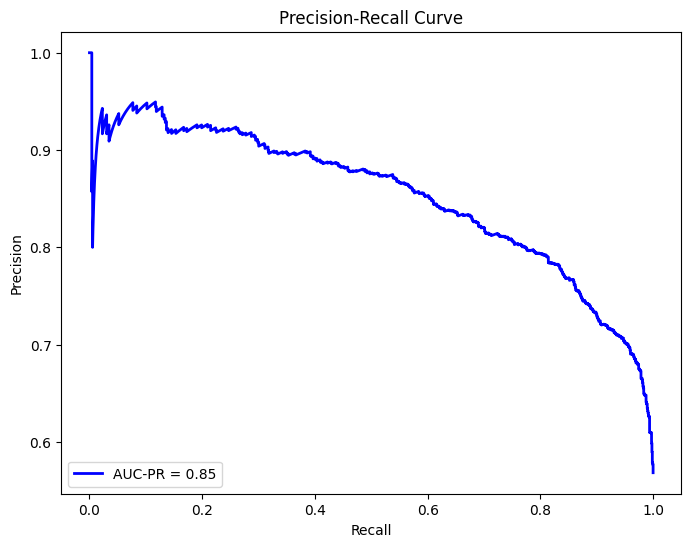

In [73]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

predictions = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, predictions)
auc_pr = average_precision_score(Y_test, predictions)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


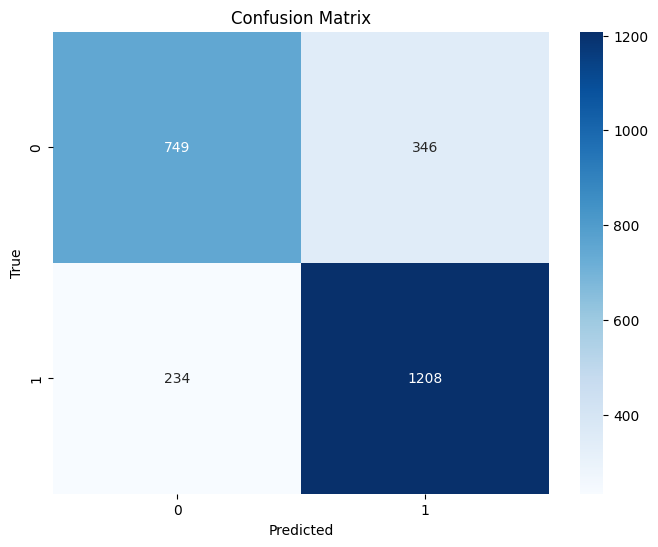

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = best_model.predict(X_test)
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The model shows good performance on the test dataset. It's shown by the high recall and precision rate, which reduce the amount of false positive and false negative value in the confusion matrix.

In addition, the AUC value is 0.84 and the shape of the curve is above the dashed line. This indicates that this model is a good predictor.